<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/44_Image_Zajsz%C5%B1r%C3%A9s_FFT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tartalom

Zajszűrés Fast Fourier Transformációval

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io

from mpl_toolkits.mplot3d import axes3d

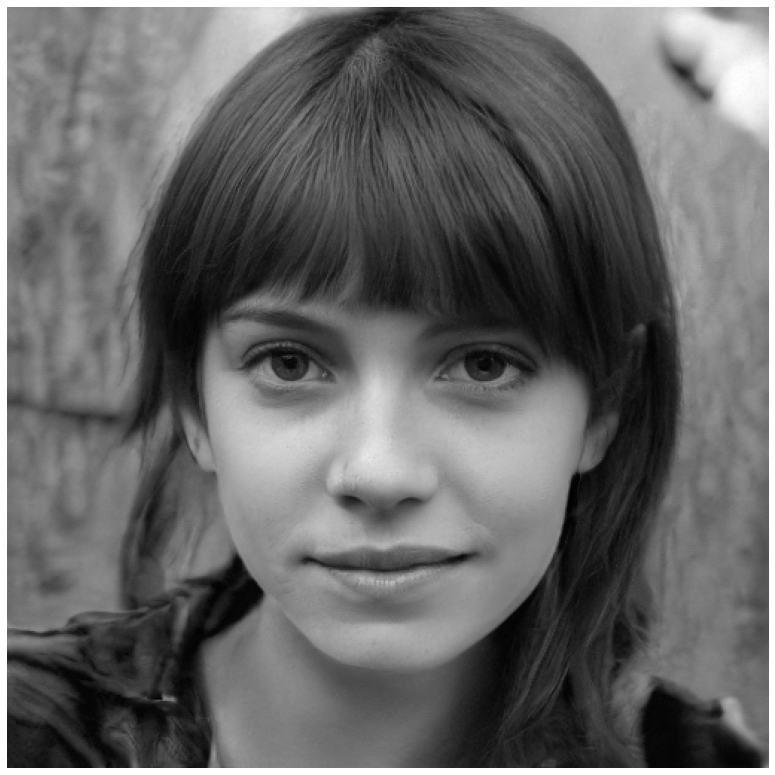

In [34]:
A = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

B = np.mean(A, -1)

B = B[::2, ::2]

plt.figure(figsize=(14, 14))
plt.imshow(B, cmap = 'gray')
plt.axis('off')
plt.show()


## Elösszőr hozzáadok egy kis mesterséges zajt

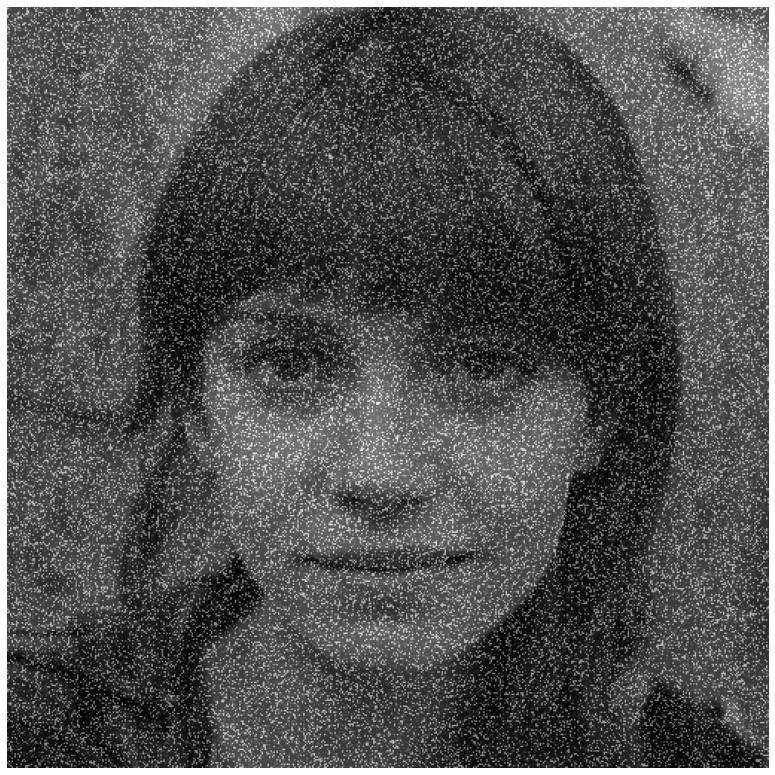

In [40]:
Bnoise = B + 200*np.random.randn(*B.shape).astype('uint8')

plt.figure(figsize=(14, 14))
plt.imshow(Bnoise, cmap = 'gray')
plt.axis('off')
plt.show()

## Zajcsökkentés,

A Fourier térbe transformált képen leválogatom azokat a koefficienseke, amelyek
egy álltalam meghatározott küszöbérték alatt vannak. A többit kizárom.
A megmaradt koefficiensek alapján rekonstruálom a képet (Inverz Fourier Transformáció)

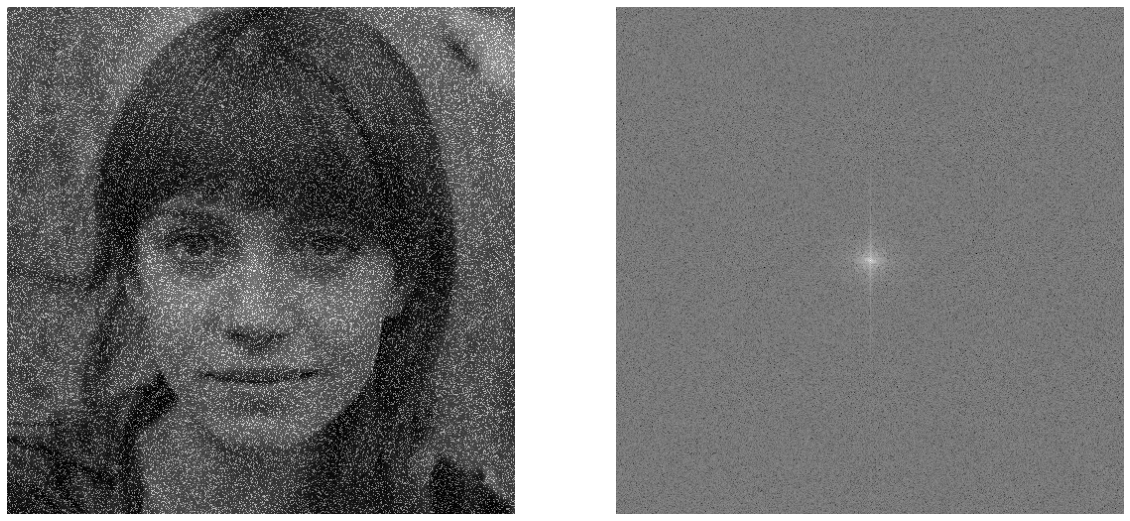

In [48]:
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # Logaritmikus skálára hozom

fig, (a1, a2) = plt.subplots(1,2, figsize=(20, 14))

a1.imshow(Bnoise,cmap='gray')
a1.axis('off')

a2.imshow(F,cmap='gray')
a2.axis('off')

plt.show()

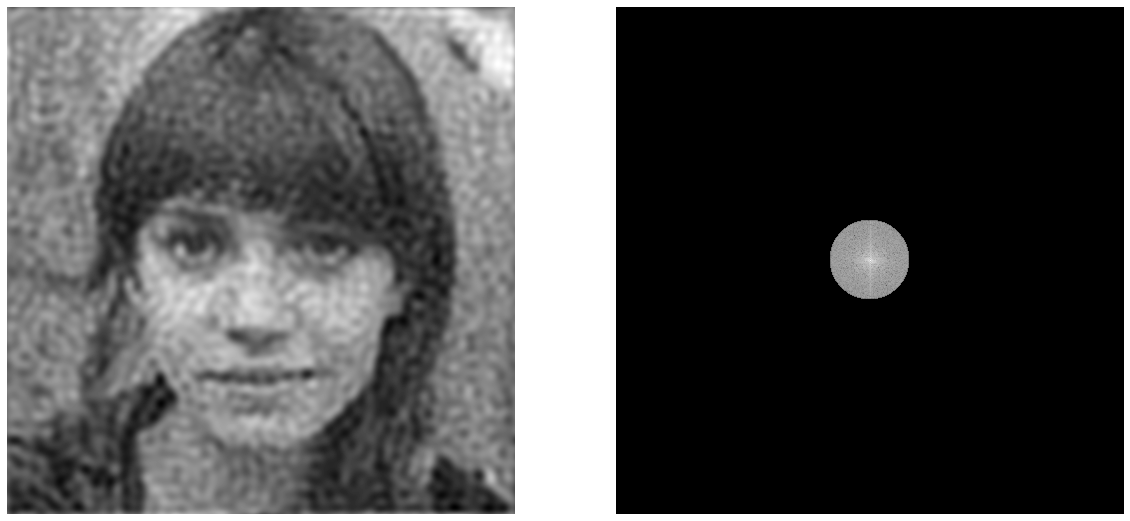

In [49]:

radius = 40

fig, (a1, a2) = plt.subplots(1,2, figsize=(20, 14))

nx,ny = B.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))

R2 = np.power(X,2) + np.power(Y,2)
ind = R2 < radius**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale

a2.imshow(Ffilt,cmap='gray')
a2.axis('off')

Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt).real
a1.imshow(Bfilt,cmap='gray')
a1.axis('off')

plt.show()